In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hackerearth-deep-learning-challenge-holidayseason/dataset/train.csv
/kaggle/input/hackerearth-deep-learning-challenge-holidayseason/dataset/test/image7761.jpg
/kaggle/input/hackerearth-deep-learning-challenge-holidayseason/dataset/test/image3202.jpg
/kaggle/input/hackerearth-deep-learning-challenge-holidayseason/dataset/test/image688.jpg
/kaggle/input/hackerearth-deep-learning-challenge-holidayseason/dataset/test/image233.jpg
/kaggle/input/hackerearth-deep-learning-challenge-holidayseason/dataset/test/image4332.jpg
/kaggle/input/hackerearth-deep-learning-challenge-holidayseason/dataset/test/image1263.jpg
/kaggle/input/hackerearth-deep-learning-challenge-holidayseason/dataset/test/image4929.jpg
/kaggle/input/hackerearth-deep-learning-challenge-holidayseason/dataset/test/image1273.jpg
/kaggle/input/hackerearth-deep-learning-challenge-holidayseason/dataset/test/image427.jpg
/kaggle/input/hackerearth-deep-learning-challenge-holidayseason/dataset/test/image8802.jpg
/kaggle/inp

In [2]:
train = pd.read_csv("/kaggle/input/hackerearth-deep-learning-challenge-holidayseason/dataset/train.csv")
train

,Image,Class
0,image3476.jpg,Miscellaneous
1,image5198.jpg,Candle
2,image4183.jpg,Snowman
3,image1806.jpg,Miscellaneous
4,image7831.jpg,Miscellaneous
...,...,...
6464,image2096.jpg,Christmas_Tree
6465,image1474.jpg,Miscellaneous
6466,image4124.jpg,Airplane
6467,image7695.jpg,Candle


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns

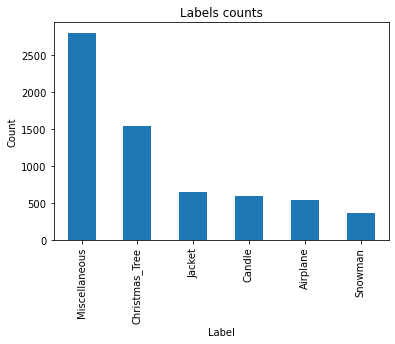

In [4]:
train.Class.value_counts().plot(kind='bar')
plt.title('Labels counts')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [5]:
directory = '../input/hackerearth-deep-learning-challenge-holidayseason/dataset/train'
img_width, img_height = 299, 299

In [6]:
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.applications.xception import Xception, preprocess_input
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input


In [7]:
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)                                

train_datagen_flow = datagen.flow_from_dataframe(
    dataframe=train,
    directory=directory,
    x_col='Image',
    y_col='Class',
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)

Found 6469 validated image filenames belonging to 6 classes.


In [8]:
import tensorflow
from tensorflow.keras import layers
from tensorflow.keras import Sequential

from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, LeakyReLU

In [9]:
pre_trained_model= InceptionResNetV2(input_shape=(img_width, img_height,3),
                              include_top=False,
                              weights='imagenet')

219062272/219055592 [==============================] - 5s 0us/step


In [10]:
pre_trained_model.trainable = False

In [11]:
pre_trained_model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
________________________________________________________________________________

In [12]:
model=Sequential()
model.add(pre_trained_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(6,activation='softmax'))
model.compile(optimizer = 'adam',
             loss='categorical_crossentropy',
             metrics=['acc'])

In [13]:
train_steps = np.ceil(train_datagen_flow.n/train_datagen_flow.batch_size)

In [14]:
history = model.fit(train_datagen_flow,
                            epochs = 12,
                            steps_per_epoch = train_steps,
                            batch_size = 16
                             )

Epoch 1/12
203/203 [==============================] - 54s 200ms/step - loss: 1.2177 - acc: 0.5692
Epoch 2/12
203/203 [==============================] - 38s 189ms/step - loss: 0.3928 - acc: 0.8730
Epoch 3/12
203/203 [==============================] - 39s 189ms/step - loss: 0.3830 - acc: 0.8774
Epoch 4/12
203/203 [==============================] - 38s 189ms/step - loss: 0.3633 - acc: 0.8798
Epoch 5/12
203/203 [==============================] - 39s 190ms/step - loss: 0.3042 - acc: 0.8953
Epoch 6/12
203/203 [==============================] - 39s 190ms/step - loss: 0.2890 - acc: 0.8980
Epoch 7/12
203/203 [==============================] - 38s 189ms/step - loss: 0.2723 - acc: 0.9141
Epoch 8/12
203/203 [==============================] - 39s 190ms/step - loss: 0.2496 - acc: 0.9135
Epoch 9/12
203/203 [==============================] - 38s 189ms/step - loss: 0.2483 - acc: 0.9176
Epoch 10/12
203/203 [==============================] - 39s 190ms/step - loss: 0.2317 - acc: 0.9215
Epoch 11/12
203/203

In [15]:
test_df = pd.DataFrame()
test_images = os.listdir('../input/hackerearth-deep-learning-challenge-holidayseason/dataset/test')
test_df['Image']=test_images
test_df.head()

,Image
0,image7761.jpg
1,image3202.jpg
2,image688.jpg
3,image233.jpg
4,image4332.jpg


In [16]:
test_generator = datagen.flow_from_dataframe(
    test_df,
    directory='../input/hackerearth-deep-learning-challenge-holidayseason/dataset/test',
    x_col = 'Image',
    y_col = None,
    target_size=(299,299),
    class_mode = None,
    batch_size=16,
    shuffle = False)

Found 3489 validated image filenames.


In [17]:
test_steps = np.ceil(test_generator.n/test_generator.batch_size)

In [18]:
pred = model.predict_generator(
    test_generator,
    steps = test_steps,
    verbose = 1)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


219/219 [==============================] - 27s 108ms/step


In [19]:
pred = np.argmax(pred,axis=-1)

In [20]:
test_df['Class']=pred

In [21]:
num_to_class = dict((y,x) for (x,y) in train_datagen_flow.class_indices.items())
num_to_class

{0: 'Airplane',
 1: 'Candle',
 2: 'Christmas_Tree',
 3: 'Jacket',
 4: 'Miscellaneous',
 5: 'Snowman'}

In [22]:
test_df['Class']=test_df['Class'].map(num_to_class)
test_df.head()

,Image,Class
0,image7761.jpg,Miscellaneous
1,image3202.jpg,Jacket
2,image688.jpg,Snowman
3,image233.jpg,Candle
4,image4332.jpg,Christmas_Tree


In [23]:
test_df.to_csv('pred.csv',index=False)